<a href="https://colab.research.google.com/github/richeym-umich/ml-tutorials/blob/main/Machine_Learning_Tutorial_Getting_Started_with_SciKitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SciKitLearn is an important Python package for implementing machine learning. It comes with several pre-configured algorithms, as well as some pre-trained models. To make use of the most basic SciKitLearn machine learning algorithms, the user only needs to import the required packages and load their own data. In this tutorial, we will demonstrate loading and using several pre-built machine learning algorithms. 

# Classification
First, we will demonstrate a classification example. In a classification problem, the user is trying to answer a question, where the answer can be one of any number of categories. In this example, we will ask the question whether a baseball team should play a game based on certain weather conditions.

We will load data about past games' weather and temperature conditions, as well as whether the team played the game. We will then train a classifier on this information to teach it how to make the determination of whether or not the team should play. Finally, we will test the classifier by giving it new conditions and seeing how it answers the question. 

We are going to use the K nearest neighbors classifier from SciKitLearn, as well as the preprocessing package to put our data in the correct format. First, we must import the necessary packages. 

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

Next, we need to organize the known data into features. The following arrays represent actual weather conditions and whether or not the team played in those conditions. Weather and temperature are considered our features, while play is considered our "target", or answer.

In [ ]:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Next, we need to numerically represent our data so that it can be fed as inputs to our classifier. A Label Encoder will change our string representations to numerical representations.

In [3]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


We convert our features and lables into numerical representations using our label encoder

In [4]:
# converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

Then, we combine our features into a single list. You're able to combine as many features as you'd like into your features list to contribute to the overall determination.

In [5]:
#combining weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

Now that we have our features ready, we can create our model. We do this by instantiating a new instance of a KNeighborsClassifier, which is predifined in SciKitLearn. We specify the number of neighbors to be 3, which means that the classifier will use the 3 closest data points to make a determination on any given data point. 

In [6]:
model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Finally, let's try using our model to predict whether the team should play in certain conditions

In [12]:
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Should the team play in these conditions?: " + str(le.inverse_transform(predicted)))

Should the team play in these conditions?: ['Yes']


# Clustering
Next, we'll take a look at a clustering example. Clustering in machine learning is where the algorithm determines what group a specific data point belongs to. The groups do not need to be predetermined, but the data point will have the most in common with the other data points in its own group. 

First we'll import the necessary libraries.

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans 

We're going to make use of the "make_blobs" function in SciKitLearn to generate data that can be sorted into clusters. We specify that we'd like 200 datapoints, and we place the data relatively close together so that we can try different numbers of optimal clusters. We plot this data so that we can start to visualize what we'll be working with. 

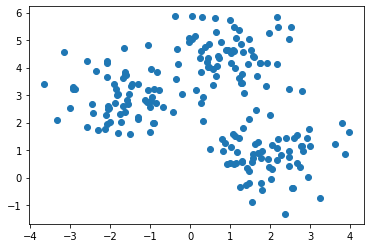

In [23]:
features, y = make_blobs(n_samples=200, cluster_std=0.8, random_state=0)
plt.scatter(features[:,0], features[:,1])

Next, we're going to use the elbow method to determine the optimal number of clusters into which to break our data. The elbow method involves training multiple classifiers with different numbers of clusters, and then plotting the results (the results are stored in the intertia_ variable- a lower inertia is more optimal). 

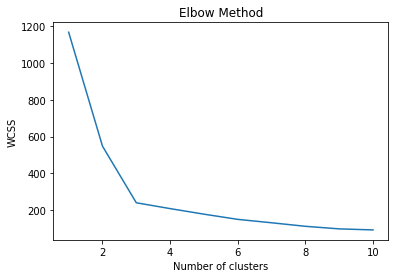

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the optimal number of clusters with the elbow method, we look at the "elbow" of the inertia graph; i.e. where the graph starts to bend. In this case, we can see the optimal number of clusters is 3. 

We'll use this information to categorize the data using the optimum number of clusters. We make use of the KMeans algorithm in SciKitLearn to predict which cluster each piece of data will fall into. 

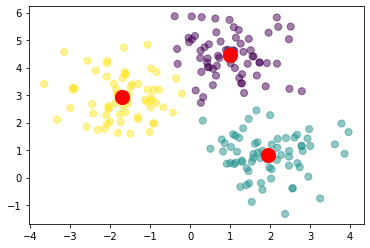

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
plt.scatter(features[:,0], features[:,1], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red')
plt.show()

As you can see, each piece of data is sorted into one of three categories. The red dots show the center of each cluster. 

# Random Forest
SciKitLearn also has a Random Forest algorithm built into its pre-built algorithms. A random forest algorithm works by collecting random samples from a dataset and then constructing a decision tree for each sample. The result from each sample is then combined with all other decision trees to form a final prediction for the test sample. 

In [36]:
from sklearn import datasets
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

iris = datasets.load_iris()

In [37]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
features = data[['sepal length', 'sepal width', 'petal length', 'petal width']] 
y = data['species']
features_train, features_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

In [39]:
model = RandomForestClassifier(n_estimators=100)
model.fit(features_train, y_train)
y_pred = model.predict(features_test)

In [40]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9111111111111111


In [44]:
# sepal length = 3
# sepal width = 5
# petal length = 4
# petal width = 2
prediction_number = model.predict([[3,5,4,2]])
flower_name = iris.target_names[prediction_number]
print(flower_name)

['virginica']
